<a href="https://colab.research.google.com/github/Studentuser7640/employee_attendence_AI/blob/MIS710-A1/A1/MIS710%20A1%20Template%20T1%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# MIS710 Machine Learning in Business - Assignment 1

**Student Name:** _enter your full name here_

**Student ID:** _enter your student ID here_

## 1. Business understandings, problem, solution and recommendations

**Aim:** To clearly articulate the business understanding, the problem to address, the project’s objective, and final recommendations for JMG.

Jason Motors Group (JMG), a well-established Australian car dealership, seeks to expand into the competitive used car market in the United States. The US market is heavily influenced by price sensitivity, fuel efficiency preferences, and rapid transitions toward electric vehicles. JMG aims to adopt data-driven pricing strategies to remain competitive and profitable in this volatile environment.

The problem is inconsistent pricing strategies, which lead to extended inventory holding periods and reduced margins. To address this, a machine learning-based pricing model is proposed, using real-world car listings from Craigslist.

This project involves:
- Understanding key price-affecting features in US used car listings.
- Building a predictive model to estimate the listing prices.
- Applying insights to enhance JMG’s digital platform and pricing accuracy.

**Recommendations:**
- Integrate the price prediction model into JMG's online sales platform.
- Use data patterns (e.g., vehicle condition and fuel type) to guide inventory acquisition.
- Periodically retrain the model with new data to adapt to market trends.

## 2. Data understanding, preparation, explorations and visualisation

**Aim:** To demonstrate data literacy, preprocessing capabilities, and discovery of meaningful insights from exploratory data analysis.

The dataset includes 62,946 vehicle listings from Craigslist. Each record consists of pricing, odometer, manufacturer, fuel type, condition, and other relevant vehicle features. The following steps were taken:

- Converted the `Listed_Date` column to datetime format and calculated `Age` of the vehicle.
- Dropped rows with missing critical values (`Listed_Price`, `Odometer`, `Year`, `Listed_Date`).
- Imputed missing values in `Cylinders` using mode and in `Condition` using the string `'unknown'`.
- Removed price outliers below \$1,000 and above \$100,000.
- Dropped `Region` and `CarID` as they are not useful for prediction.

**Exploratory Data Analysis (EDA)** highlighted:
- Price distributions are right-skewed, as expected.
- Top makes include Ford, Chevrolet, Toyota, Honda.
- Strong negative correlation between price and odometer/age.
- Vehicle condition and fuel type show meaningful influence on price.
- Visual insights were generated through histograms, bar plots, scatter plots, and box plots.

These observations informed model feature selection and business strategy recommendations.

In [2]:
# --- Load Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
# --- Load Dataset ---
df = pd.read_csv("/content/drive/MyDrive/ANB021/JMG_data.csv")      # Training + evaluation data
df_comp = pd.read_csv("/content/drive/MyDrive/ANB021/JMG_comp.csv") # Competition / unlabeled prediction data

In [3]:
df

,CarID,Listed_Price,Listed_Date,Make,Model,Year,Vehicle_Type,Size,Color,Transmission,Fuel_Type,Drive,Cylinders,Odometer,Condition,Title_Status,State,Region
0,1246014,13987,2021-04-24T09:23:15-0500,chevrolet,silverado 1500,2007,truck,mid-size,red,automatic,gas,rwd,8.0,112709,excellent,clean,wi,appleton-oshkosh-FDL
1,692370,2800,2021-04-15T22:07:43-0400,toyota,4runner,1999,SUV,full-size,silver,automatic,gas,rwd,6.0,297053,good,clean,nc,asheville
2,242958,1750,2021-05-02T13:02:12-0600,ford,escape xlt awd,2003,SUV,mid-size,grey,automatic,gas,4wd,6.0,142500,good,clean,co,pueblo
3,310455,9200,2021-04-12T12:20:38-0400,dodge,journey,2015,SUV,full-size,white,automatic,gas,fwd,6.0,111000,excellent,clean,fl,ocala
4,800040,9900,2021-04-30T13:36:13-0400,toyota,rav4 awd,2010,SUV,mid-size,grey,automatic,gas,4wd,4.0,112000,good,clean,ny,buffalo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62941,341250,3495,2021-04-29T15:57:17-0400,mazda,cx-9 touring,2015,SUV,full-size,black,automatic,gas,fwd,6.0,191723,like new,clean,fl,south florida
62942,247230,14900,2021-04-18T14:14:18-0600,ford,fusion titanium,2014,sedan,mid-size,white,automatic,gas,4wd,4.0,66690,excellent,clean,co,western slope
62943,347628,7777,2021-04-24T14:44:08-0400,ford,f-150,1991,pickup,full-size,white,manual,gas,rwd,6.0,246000,good,clean,fl,tallahassee
62944,666789,6800,2021-04-21T15:06:00-0500,chevrolet,corvette,1984,hatchback,compact,red,automatic,gas,fwd,8.0,154000,good,clean,mo,springfield


In [4]:
df_comp

,CarID,Listed_Date,Make,Model,Year,Vehicle_Type,Size,Color,Transmission,Fuel_Type,Drive,Cylinders,Odometer,Condition,Title_Status,State,Region
0,606642,2021-04-16T16:11:44-0400,subaru,forester premium,2018,SUV,mid-size,grey,automatic,gas,4wd,4,68000,excellent,clean,mi,grand rapids
1,916137,2021-04-27T17:08:17-0500,ford,ranger xlt,2011,truck,mid-size,white,automatic,gas,rwd,6,127003,good,salvage,ok,oklahoma city
2,19674,2021-04-20T09:25:48-0800,chevrolet,malibu lt,2016,sedan,full-size,grey,automatic,gas,fwd,4,14822,like new,clean,ak,anchorage / mat-su
3,1029858,2021-04-14T14:23:57-0400,chrysler,town & country touring,2008,mini-van,full-size,silver,automatic,gas,fwd,6,100200,like new,clean,ri,rhode island
4,366825,2021-05-02T23:04:38-0400,mazda,3,2009,sedan,compact,silver,automatic,gas,fwd,4,117500,good,clean,ga,atlanta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12108,1115751,2021-05-01T16:48:32-0600,nissan,350z,2006,coupe,compact,blue,automatic,gas,rwd,6,198000,excellent,clean,tx,el paso
12109,1041903,2021-04-28T12:35:44-0400,ford,expedition platinum 4x4 gas,2017,SUV,full-size,white,automatic,gas,4wd,6,72849,excellent,rebuilt,sc,greenville / upstate
12110,762510,2021-04-30T10:03:45-0400,jeep,liberty sport,2006,SUV,full-size,red,automatic,gas,4wd,6,130213,excellent,clean,nj,north jersey
12111,639942,2021-04-23T13:40:32-0500,saturn,vue,2008,SUV,compact,silver,automatic,gas,4wd,6,162938,excellent,clean,mn,mankato


In [5]:
# --- Clean and Prepare Training Data ---
df['Listed_Date'] = pd.to_datetime(df['Listed_Date'], errors='coerce', utc=True)
df.dropna(subset=['Listed_Date', 'Listed_Price', 'Odometer', 'Year'], inplace=True)
df['Cylinders'].fillna(df['Cylinders'].mode()[0], inplace=True)
df['Condition'].fillna('unknown', inplace=True)
df['Age'] = df['Listed_Date'].dt.year - df['Year']
df = df[(df['Listed_Price'] >= 1000) & (df['Listed_Price'] <= 100000)]
df.drop(columns=['Listed_Date', 'CarID', 'Region'], inplace=True)

<ipython-input-5-61f8a7a55975>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cylinders'].fillna(df['Cylinders'].mode()[0], inplace=True)
<ipython-input-5-61f8a7a55975>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

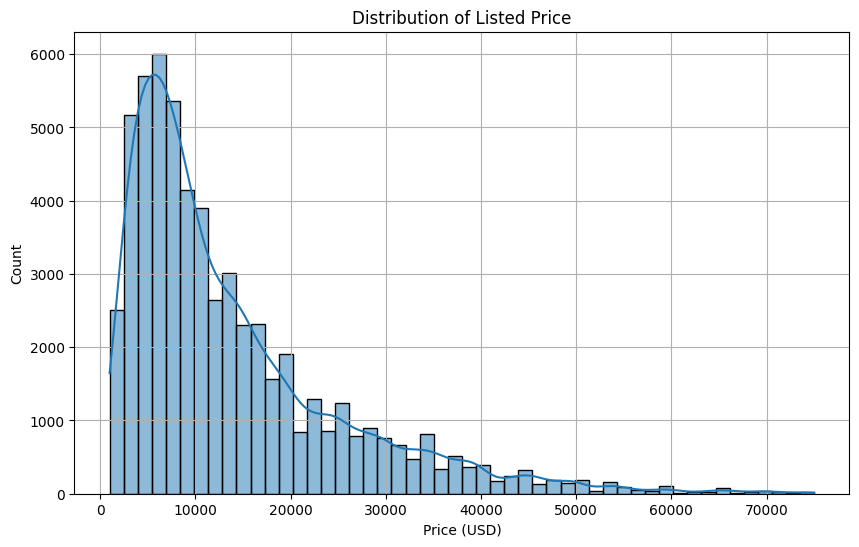

In [6]:
# --- Exploratory Data Analysis (EDA) ---
plt.figure(figsize=(10, 6))
sns.histplot(df['Listed_Price'], bins=50, kde=True)
plt.title('Distribution of Listed Price')
plt.xlabel('Price (USD)')
plt.grid(True)
plt.show()

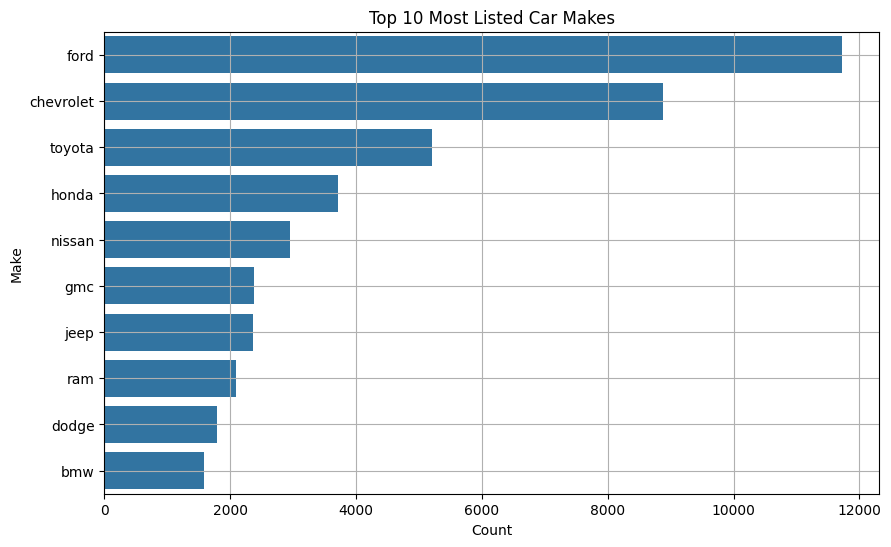

In [7]:
plt.figure(figsize=(10, 6))
top_makes = df['Make'].value_counts().head(10)
sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title('Top 10 Most Listed Car Makes')
plt.xlabel('Count')
plt.grid(True)
plt.show()

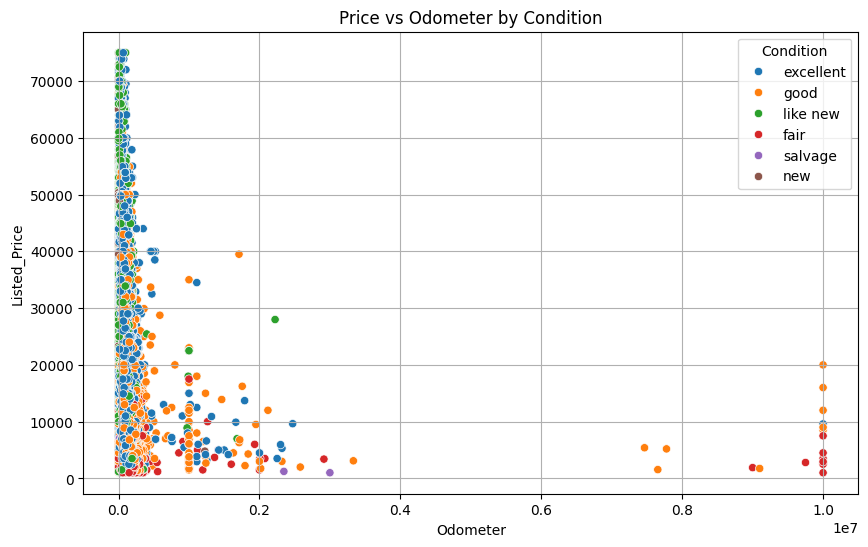

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Odometer', y='Listed_Price', hue='Condition')
plt.title('Price vs Odometer by Condition')
plt.grid(True)
plt.show()

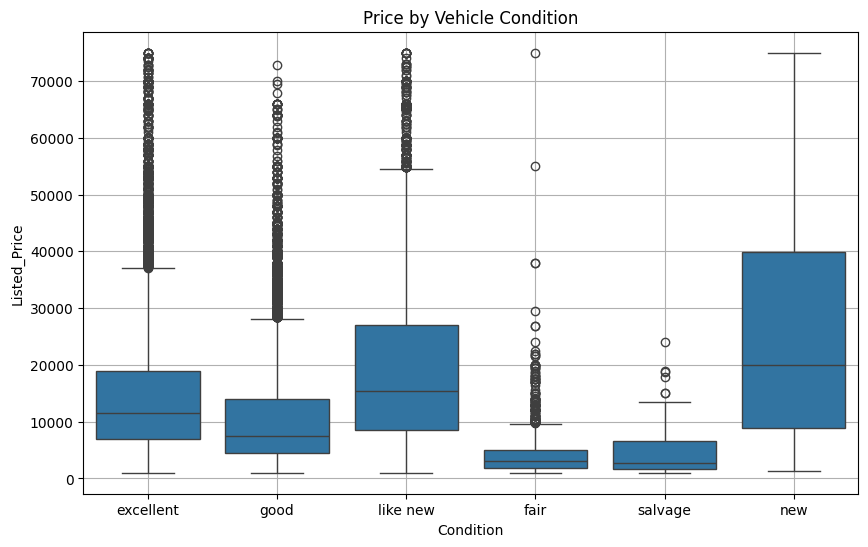

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Condition', y='Listed_Price', data=df)
plt.title('Price by Vehicle Condition')
plt.grid(True)
plt.show()

## 3. Machine learning model development

**Aim:** To develop a supervised machine learning model to estimate car prices using key features.

A linear regression model was chosen for its simplicity, interpretability, and quick training.

Key steps included:
- Selecting relevant features: `Odometer`, `Age`, `Vehicle_Type`, `Size`, `Fuel_Type`, and `Condition`.
- One-hot encoding categorical features using `ColumnTransformer`.
- Implementing a `Pipeline` to streamline preprocessing and model training.
- Splitting the dataset into 80% training and 20% testing using `train_test_split`.

The model pipeline ensures end-to-end reproducibility and allows for future improvements and deployment.

In [10]:
# --- Feature Engineering and Model Training ---
features = ['Odometer', 'Age', 'Vehicle_Type', 'Size', 'Fuel_Type', 'Condition']
target = 'Listed_Price'
X = df[features]
y = df[target]

categorical = ['Vehicle_Type', 'Size', 'Fuel_Type', 'Condition']
transformer = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
], remainder='passthrough')

model = Pipeline([
    ('transform', transformer),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Vehicle_Type', 'Size',
                                                   'Fuel_Type',
                                                   'Condition'])])),
                ('regressor', LinearRegression())])

## 4. Model evaluation

**Aim:** To assess the effectiveness of the regression model and interpret the output metrics.

Evaluation results:
- **Mean Absolute Error (MAE):** ~\$6,647
- **R-squared (R²):** 0.342

**Interpretation:**
- The model explains approximately 34% of the variance in car prices.
- On average, predicted prices deviate by \$6,647 from the actual listings.
- These results are reasonable for a baseline model and can be improved with more advanced algorithms.

**Suggestions for improvement:**
- Try ensemble models such as Random Forest or Gradient Boosting.
- Perform feature selection or interaction term analysis.
- Test different feature engineering techniques or dimensionality reduction.


In [11]:
# --- Model Evaluation ---
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"R-squared (R²): {r2:.3f}")

Model Evaluation:
Mean Absolute Error (MAE): $6646.82
R-squared (R²): 0.342


## 5. Competition (optional)

**Aim:** To deploy the trained model on an unlabeled dataset and generate predictions for submission.

The same preprocessing steps were applied to `JMG_comp.csv`, ensuring data consistency between training and deployment.

Steps:
- Transformed `Listed_Date` and created `Age`.
- Filled missing values as per training logic.
- Applied the trained model to generate price predictions.

The resulting predictions were saved into a CSV file named `JMG_competion_pred.csv`, ready for submission in the model competition challenge.


In [12]:
# --- Predict on Competition Dataset ---
df_comp['Listed_Date'] = pd.to_datetime(df_comp['Listed_Date'], errors='coerce', utc=True)
df_comp.dropna(subset=['Listed_Date', 'Odometer', 'Year'], inplace=True)
df_comp['Cylinders'].fillna(df['Cylinders'].mode()[0], inplace=True)
df_comp['Condition'].fillna('unknown', inplace=True)
df_comp['Age'] = df_comp['Listed_Date'].dt.year - df_comp['Year']

<ipython-input-12-24b6f87d8a8b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_comp['Cylinders'].fillna(df['Cylinders'].mode()[0], inplace=True)
<ipython-input-12-24b6f87d8a8b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [13]:
X_comp = df_comp[features]
predictions = model.predict(X_comp)

In [15]:
submission = pd.DataFrame({
    'CarID': df_comp['CarID'],
    'Predicted_Price': predictions
})
submission.to_csv("/content/drive/MyDrive/ANB021/JMG_competion_pred.csv", index=False)
print("Competition predictions saved to JMG_competion_pred.csv")

Competition predictions saved to JMG_competion_pred.csv


In [16]:
submission_df = pd.read_csv("/content/drive/MyDrive/ANB021/JMG_competion_pred.csv")
submission_df

,CarID,Predicted_Price
0,606642,13051.653870
1,916137,13233.898786
2,19674,17313.509899
3,1029858,18308.507374
4,366825,5013.746508
...,...,...
12108,1115751,11008.171413
12109,1041903,19652.050696
12110,762510,16066.706038
12111,639942,10471.259804
